### Retrieve COCO image IDs we used in submission version
<br>250 test images

In [3]:
import json

In [24]:
with open('/home/liuxiao/TuringGithub/imagecaption/MturkExps/image_captioning_task/Data/imgset_metadata.json','r') as f:
    turing_cap = json.load(f)

In [25]:
test_images = []
for _, entry in turing_cap.items():
    if entry['dataset'] == 'coco_test_2017':
        test_images.append(entry['coco_fname'].split('/')[-1])
print(len(test_images))

250


### Retrieve COCO 2017 Val Images and sample 1,000 images

In [11]:
import json
import random
random.seed(42)

In [31]:
val2017_subset = {}
with open('/home/liuxiao/Downloads/COCO2017/annotations_trainval2017/annotations/captions_val2017.json','r') as f:
    captions_val2017 = json.load(f)
    
images_subset = random.sample(captions_val2017['images'], 1000)
print(len(captions_val2017['annotations']))

### reorganize image subset dictionary
images_subset_d = {}
for entry in images_subset:
    images_subset_d[entry['id']] = entry

### reorganize annotation dictionary
captions_val2017_anno_d = {}
for entry in captions_val2017['annotations']:
    if entry['image_id'] not in images_subset_d:
        continue
    if entry['image_id'] not in captions_val2017_anno_d:
        tmp_d = {"image_id": entry['image_id'], "captions": []}
        captions_val2017_anno_d[entry['image_id']] = {**tmp_d, **images_subset_d[entry['image_id']]}
    captions_val2017_anno_d[entry['image_id']]['captions'].append(entry['caption'])
with open('/home/liuxiao/TuringGithub/XiaoData/cocoval2017-subset-for-rebuttal-r3.8.json','w') as f:
    json.dump(captions_val2017_anno_d,f)

25014


##### making a subset folder

In [28]:
[_['file_name'] for _ in captions_val2017_anno_d.values() if _ in test_images]

[]

In [22]:
import shutil
import os
src_root = '/home/liuxiao/Downloads/COCO2017/val2017'
dst_root = '/home/liuxiao/Downloads/COCO2017/val2017_subset_rebuttal' 
for k, entry in captions_val2017_anno_d.items():
    shutil.copy(os.path.join(src_root,entry['file_name']), dst_root)

In [25]:
import json
with open('/home/liuxiao/TuringGithub/XiaoData/cocoval2017-subset-for-rebuttal-r3.8.json','r') as f:
    captions_val2017_anno_d = json.load(f)
captions_val2017_anno_d

{'172330': {'image_id': 172330,
  'captions': ['A cat in between two cars in a parking lot.',
   'A cat stands between two parked cars on a grassy sidewalk. ',
   'A cat at attention between two parked cars.',
   'A grey and white cat watches from between parked cars.',
   'A grey and white cat standing in the grass in a parking lot. '],
  'license': 1,
  'file_name': '000000172330.jpg',
  'coco_url': 'http://images.cocodataset.org/val2017/000000172330.jpg',
  'height': 480,
  'width': 640,
  'date_captured': '2013-11-15 07:21:17',
  'flickr_url': 'http://farm8.staticflickr.com/7071/7255497726_e2e4ee6f2b_z.jpg',
  'id': 172330},
 '472678': {'image_id': 472678,
  'captions': ['An office cubicle with multiple computers in it',
   'An office desk with two flat panel monitors.',
   'An office desk with two computer screens, books diagrams and a phone on it.',
   'Two computer monitors are placed beside each other on a desk.',
   'A desk with two monitors depicting security cameras.'],
  'l

### dummy test - BLEU4, CIDEr

##### For CIDEr package, use: https://github.com/michelecafagna26/cider <br>
and change line 27 in ```cidereval/scorers.py``` <br>
from
```def cider(predictions, references, df="coco-val"):``` <br>
to
```def cider(references, predictions, df="coco-val"):```<br>
##### For BLEU4 package, use: nltk

In [2]:
## !pip install git+https://github.com/michelecafagna26/cider.git#egg=cidereval

In [14]:
# !pip install sacrebleu

In [1]:
from cidereval import cider, ciderD



# list of lists (the more the references thae better)
refs = [ ["a shirtless man walking a bike down a rural street.",
          "a person walking pulling a bike next to him",
          "shirtless man pushing his bike on a city street.",
          "this gentleman is shirtless, walking his bicycle down the street of an asian city.",
          "a shirtless man walking down city street with a bike"],
        ["guy up in the air doing a skateboard trick!",
          "a person doing a skateboard flip as another watches.",
          "a person jumping a skate board up a curb while a boy watches while sitting on a bike.",
          "there is a skate boarder that is doing a trick in the air",
          "a person doing tricks on a skateboard while a man on a bicycle watches."]
        ]

# list of predictions
preds = ["a man walking in the street", "a guy is skating and a boy is watching on a bicycle"]
     
cider_scores = cider(refs, preds, df="corpus")
print(cider_scores)

{'avg_score': 0.7166376766266953, 'scores': array([1.14630895, 0.28696641])}


PTBTokenizer tokenized 132 tokens at 2923.22 tokens per second.
PTBTokenizer tokenized 19 tokens at 423.15 tokens per second.


In [12]:
from nltk.translate.bleu_score import sentence_bleu

# Define your desired weights (example: higher weight for bi-grams)
# weights = (0.25, 0.25, 0, 0) # Weights for uni-gram, bi-gram, tri-gram, and 4-gram

# Reference and predicted texts (same as before)
reference = [["the", "picture", "is", "clicked", "by", "me"], ["this", "picture", "was", "clicked", "by", "me"]]
predictions = ["the", "picture", "the", "picture", "by", "me"]

# Calculate BLEU score with weights
score = sentence_bleu(reference, predictions)
print(score)


1.0719249972567852e-154


/home/liuxiao/anaconda3/envs/torchenv/lib/python3.8/site-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/home/liuxiao/anaconda3/envs/torchenv/lib/python3.8/site-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)


### Calculating BLEU4, CIDEr for new captioning models

In [4]:
with open('/home/liuxiao/TuringGithub/XiaoData/cocoval2017-subset-for-rebuttal-r3.8.json','r') as f:
    captions_val2017_anno_d = json.load(f)

In [32]:
filename2imageid = {v['file_name']:k for k,v in captions_val2017_anno_d.items()}

##### Flamingo

In [6]:
import pickle

with open("/home/liuxiao/TuringGithub/XiaoData/all_results/flamingo-4B-vitl-rpj3b-langinstruct_caption_cocoval201717_r3.8.pkl", 'rb') as f:
    flamingo_d = pickle.load(f)
    

In [17]:
import numpy as np
scores = []
refs_overall = []
preds = []
for imgid, cap in flamingo_d.items():
    refs = captions_val2017_anno_d[imgid]['captions']
    score = sentence_bleu([_.lower().split(' ') for _ in refs], cap.split(' '))
    scores.append(score)
    refs_overall.append(refs)
    preds.append(cap)
cider_scores = cider(refs_overall, preds, df="corpus")
print(np.mean(scores))
print(cider_scores)

PTBTokenizer tokenized 61506 tokens at 606759.34 tokens per second.
PTBTokenizer tokenized 11298 tokens at 164652.18 tokens per second.


0.035332565663443005
{'avg_score': 0.9231919678578969, 'scores': array([8.05890444e-01, 1.32625039e-07, 1.09474886e-01, 1.71438149e+00,
       4.00880343e-01, 8.63346646e-01, 6.49093255e-01, 1.03736437e+00,
       4.75642182e-01, 9.17828501e-01, 8.44953378e-01, 2.60673087e+00,
       7.48254274e-01, 3.96850894e+00, 3.13662425e+00, 1.45235969e-01,
       1.15326803e+00, 8.62159325e-01, 7.95169260e-01, 4.98241987e-01,
       1.24817013e+00, 5.77953392e-07, 4.30917485e-01, 1.69835420e+00,
       4.04538732e-01, 1.10138080e+00, 9.84062488e-01, 9.96747355e-01,
       1.85193381e+00, 5.43891706e-01, 4.07694164e-03, 7.20381481e-01,
       2.43625607e+00, 9.22397166e-02, 6.97345866e-01, 2.80131173e+00,
       8.06721785e-07, 2.32603864e+00, 1.13197337e+00, 6.94104334e-01,
       5.68410724e-01, 2.47211353e+00, 1.43755190e+00, 1.20675427e+00,
       1.37782523e+00, 2.45780640e-01, 4.30182636e-01, 0.00000000e+00,
       9.76677551e-01, 1.46232756e+00, 4.58933754e-01, 8.71376136e-01,
       2.960

##### SCST

In [29]:
with open('/home/liuxiao/self-critical.pytorch/vis/vis_cocoval17.json', 'r') as f:
    scst = json.load(f)

In [38]:
scores = []
refs_overall = []
preds = []
for entry in scst:
    file_name = entry['file_name'].split('/')[-1]
    imgid = filename2imageid[file_name]
    refs = captions_val2017_anno_d[imgid]['captions']
    refs_overall.append(refs)
    preds.append(entry['caption'])
    score = sentence_bleu([_.lower().split(' ') for _ in refs], entry['caption'].split(' '))
    scores.append(score)
cider_scores = cider(refs_overall, preds, df="corpus")
print(np.mean(scores))
print(cider_scores)

/home/liuxiao/anaconda3/envs/torchenv/lib/python3.8/site-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/home/liuxiao/anaconda3/envs/torchenv/lib/python3.8/site-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/home/liuxiao/anaconda3/envs/torchenv/lib/python3.8/site-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.


0.19448798446458462
{'avg_score': 1.242789152698271, 'scores': array([7.96495521e-01, 1.79304041e+00, 1.10194793e+00, 2.82619945e-01,
       6.13006427e-01, 7.10927595e-01, 1.27941412e-01, 1.43672353e+00,
       3.61691156e-01, 1.73874855e+00, 5.79186068e-01, 1.63201071e+00,
       1.84244987e-03, 4.43546216e-01, 1.61712559e+00, 2.28132919e+00,
       7.57960218e-01, 9.72454282e-01, 2.11822661e+00, 2.04498624e+00,
       9.04870558e-01, 9.86268634e-01, 3.30031598e-01, 1.53835036e+00,
       9.30580162e-01, 1.69212501e+00, 2.09700906e+00, 9.15071822e-02,
       1.89135372e+00, 5.58896412e-02, 2.02616903e+00, 1.71219646e+00,
       1.48956243e+00, 4.74548775e-03, 1.07527258e+00, 7.95178546e-01,
       9.13743429e-01, 1.91435910e+00, 2.53149558e+00, 1.00375891e+00,
       9.97320579e-01, 1.26286676e+00, 2.59966692e+00, 5.27008527e-01,
       1.60937434e+00, 7.88669489e-01, 1.77980005e+00, 3.09025915e+00,
       7.36061859e-01, 2.03084857e+00, 2.08024207e+00, 1.00383262e+00,
       1.42839

##### LLaVa

In [41]:
import pickle

with open('/home/liuxiao/TuringGithub/XiaoData/all_results/llava-v1.6-mistral-7b_image_captioning_v2_cocoval2017_r3.8.pkl','rb') as f:
    llava = pickle.load(f)
scores = []
refs_overall = []
preds = []
for imgid, cap in llava.items():
    refs = captions_val2017_anno_d[imgid]['captions']
    score = sentence_bleu([_.lower().split(' ') for _ in refs], cap.split(' '))
    scores.append(score)
    refs_overall.append(refs)
    preds.append(cap)
cider_scores = cider(refs_overall, preds, df="corpus")
print(np.mean(scores))
print(cider_scores)

/home/liuxiao/anaconda3/envs/torchenv/lib/python3.8/site-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/home/liuxiao/anaconda3/envs/torchenv/lib/python3.8/site-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/home/liuxiao/anaconda3/envs/torchenv/lib/python3.8/site-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.


0.04999218678266185
{'avg_score': 1.098131122219939, 'scores': array([1.78547565e+00, 1.43345225e+00, 1.14751574e+00, 8.80685014e-01,
       8.88029199e-01, 8.94066265e-01, 1.00162878e+00, 7.71885319e-01,
       3.37719070e-01, 1.06169074e+00, 1.30410253e+00, 2.21359693e+00,
       1.62259497e+00, 2.00848936e+00, 1.49895884e+00, 5.36788925e-01,
       9.42927949e-01, 4.55517184e-01, 1.39079523e+00, 6.71583114e-01,
       1.47114952e+00, 3.59402507e-01, 3.23183500e-01, 4.54733709e-01,
       1.43069608e+00, 9.52495291e-01, 1.73554793e+00, 1.02042301e+00,
       2.13432413e-02, 1.95352248e+00, 1.00919978e+00, 9.72851869e-01,
       5.31426271e-01, 7.72310001e-01, 6.16804963e-01, 1.29151635e+00,
       4.31220444e-01, 1.13470183e+00, 8.47840932e-01, 1.33433740e+00,
       1.18200681e+00, 1.35947574e+00, 1.55224456e+00, 8.27453138e-01,
       5.78040645e-01, 2.90782085e-01, 1.09739712e+00, 1.09643862e+00,
       4.96548655e-01, 6.46590528e-01, 4.95480253e-01, 1.12566668e+00,
       1.54212

##### ChatGPT

In [40]:
import pickle

with open('/home/liuxiao/TuringGithub/XiaoData/all_results/chatgpt_image_captioning_v3_cocoval2017_rebuttal_r3.8.pkl','rb') as f:
    chatgpt = pickle.load(f)
scores = []
refs_overall = []
preds = []
for imgid, cap in chatgpt.items():
    refs = captions_val2017_anno_d[imgid]['captions']
    score = sentence_bleu([_.lower().split(' ') for _ in refs], cap.split(' '))
    scores.append(score)
    refs_overall.append(refs)
    preds.append(cap)
cider_scores = cider(refs_overall, preds, df="corpus")
print(np.mean(scores))
print(cider_scores)

/home/liuxiao/anaconda3/envs/torchenv/lib/python3.8/site-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/home/liuxiao/anaconda3/envs/torchenv/lib/python3.8/site-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/home/liuxiao/anaconda3/envs/torchenv/lib/python3.8/site-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.


0.02538867569266842
{'avg_score': 0.813359683257762, 'scores': array([1.76317633e+00, 5.71349330e-01, 4.06840107e-01, 1.19725302e+00,
       4.27340716e-01, 1.12410615e+00, 2.10198861e-01, 6.50330424e-01,
       1.04602679e+00, 1.23473556e+00, 8.90066902e-01, 1.39992273e+00,
       1.00150723e+00, 1.04923014e+00, 1.40954219e+00, 4.19484160e-01,
       8.17817258e-01, 2.89408788e-01, 1.49489486e+00, 1.13325384e-01,
       6.26220919e-01, 4.90998261e-01, 7.59009440e-01, 9.02899298e-01,
       1.67121792e-01, 8.60327277e-01, 1.86884176e+00, 1.16786535e+00,
       1.28894900e+00, 1.07519098e+00, 5.60090773e-01, 8.47700863e-01,
       1.15823544e+00, 6.16323792e-01, 5.91228812e-01, 1.97559447e+00,
       5.75342992e-02, 1.11426598e+00, 2.27771430e-01, 3.58441486e-01,
       9.88584523e-01, 9.22878664e-01, 1.12881602e+00, 5.16407850e-01,
       5.99445684e-01, 2.06429630e-01, 2.20523387e-01, 1.02707270e+00,
       6.93065419e-01, 7.55933961e-01, 6.54010069e-01, 8.49049348e-01,
       1.66535

[0.5816667079925537, 0.5108333230018616, 0.5024999976158142, 0.5858333110809326, 0.5850000381469727, 0.5300000309944153, 0.7200000286102295, 0.5550000071525574]


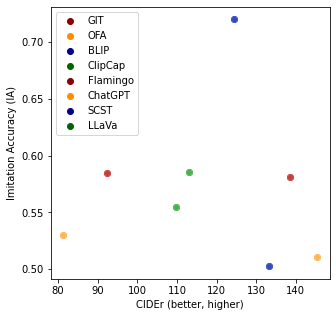

Bad pipe message: %s [b'\xeai\xf9\xd4\xc6}\x95\x84\x86mK\x86\xa6{v\xb1@\xb1\x00\x02\xbc\x00\x00\x00\x01\x00\x02\x00\x03\x00\x04\x00\x05\x00\x06\x00\x07\x00\x08\x00\t\x00\n\x00\x0b\x00\x0c\x00\r\x00\x0e\x00\x0f\x00\x10\x00\x11\x00\x12\x00\x13\x00\x14\x00\x15\x00\x16\x00\x17\x00\x18\x00\x19\x00\x1a\x00\x1b\x00\x1e\x00\x1f\x00 \x00!\x00"\x00#\x00$\x00%\x00&\x00\'\x00(\x00)\x00*\x00+\x00,\x00-\x00.\x00/\x000\x001\x002\x003\x004\x005\x006\x007\x008\x009\x00:\x00;\x00<\x00=']
Bad pipe message: %s [b'\xde\x8a\x84W\xf1H(Q\xb2\xdf\xcaG \x88\xf7wf\xa5\x00\x02\xbc\x00\x00\x00\x01\x00\x02\x00\x03\x00\x04\x00\x05\x00\x06\x00\x07\x00\x08\x00\t\x00\n\x00\x0b\x00\x0c\x00\r\x00\x0e\x00\x0f\x00\x10\x00\x11\x00\x12\x00\x13\x00\x14\x00\x15\x00\x16\x00\x17\x00\x18\x00\x19\x00\x1a\x00\x1b\x00\x1e\x00\x1f\x00 \x00!\x00"\x00#\x00$\x00%\x00&\x00\'\x00(\x00)\x00*\x00+\x00,\x00-\x00.\x00/\x000\x001\x002\x003\x004\x005\x006\x007\x008\x009\x00:\x00;\x00<\x00=\x00>\x00?\x00@\x00A\x00B']
Bad pipe message: %s [b'\x03

In [53]:
import matplotlib.pyplot as plt
import numpy as np

key = 'inlab'
folderpath = './plots/Task1_' + key + '_' #for saving the plots

with open('/home/liuxiao/TuringGithubRunnable/imagecaption/Plot/savedResults/Task1_inlab_confmat.np.npy', "rb") as fp:   # Unpickling
    confmat = np.load(fp)

with open('/home/liuxiao/TuringGithubRunnable/imagecaption/Plot/savedResults/Task1_combined_confmat.np.npy', "rb") as fp:   # Unpickling
    confmat_combined = np.load(fp)
    
human = confmat[0][0]
model_Turing = ((np.array([confmat[2][1], confmat[3][1], confmat[4][1], confmat[5][1]]) + human)/2).tolist()

human = confmat_combined[0][0]
model_Turing_new = ((np.array([confmat_combined[2][1], confmat_combined[3][1], confmat_combined[4][1], confmat_combined[5][1]]) + human)/2).tolist()
model_Turing += model_Turing_new
print(model_Turing)
model_name = ['GIT','OFA','BLIP','ClipCap'] + ['Flamingo', 'ChatGPT', 'SCST', 'LLaVa']
model_BLEU4_COCO = [42, 43.9, 39.7, 33.53]
model_CIDEr_COCO = [138.5, 145.3, 133.3, 113.08] + [92.3,81.3,124.3,109.8]
model_size = (np.array([347, 930, 446, 43]+[3000,1800000,13.4,7570 ])*6).tolist()

colorlist = ['darkred','darkorange','darkblue','darkgreen']*2
SizeColorlist = ['salmon','navajowhite','cornflowerblue','palegreen']*2

# ########### plot based on BLEU4

# fig = plt.figure()

# # doubling the width of markers
# y = model_Turing
# x = model_BLEU4_COCO
# #s = model_CIDEr_COCO

# for i, c in enumerate(x):
#     plt.scatter(x[i], y[i], color=colorlist[i], marker='o')
    
# for i, c in enumerate(x):
#     plt.scatter(x[i], y[i], color=SizeColorlist[i], s=model_size[i], marker = 'o', alpha=0.5)
    
# plt.legend(model_name, loc='lower left')

# # ax.spines['top'].set_visible(False)
# # ax.spines['right'].set_visible(False)

# # fig.tight_layout()

# fig.set_figwidth(5)
# fig.set_figheight(5)

# plt.xlim([33,46])
# plt.ylim([0.45,0.7])

# plt.xlabel('BLEU4 (better, higher)')
# plt.ylabel('Imitation Accuracy (IA)')

# #plt.scatter(x,y)#,s=s)

# plt.savefig(folderpath + '_Accu_Turing_correlation_BLEU4.eps', format='eps', bbox_inches='tight')
# plt.savefig(folderpath + '_Accu_Turing_correlation_BLEU4.png', bbox_inches='tight')
# plt.show()

########### plot based on CIDEr

fig = plt.figure()

# doubling the width of markers
y = model_Turing
#x = model_BLEU4_COCO
x = model_CIDEr_COCO


for i, c in enumerate(x):
    plt.scatter(x[i], y[i], color=colorlist[i], marker='o')
for i, c in enumerate(x):
    plt.scatter(x[i], y[i], color=SizeColorlist[i],  marker = 'o', alpha=0.5)  #s=model_size[i], 

    
plt.legend(model_name, loc='upper left')

# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)

# fig.tight_layout()

fig.set_figwidth(5)
fig.set_figheight(5)

# plt.xlim([110,160])
# plt.ylim([0.45,0.7])

plt.xlabel('CIDEr (better, higher)')
plt.ylabel('Imitation Accuracy (IA)')

#plt.scatter(x,y)#,s=s)

# plt.savefig(folderpath + '_Accu_Turing_correlation_CIDER.eps', format='eps', bbox_inches='tight')
# plt.savefig(folderpath + '_Accu_Turing_correlation_CIDER.png', bbox_inches='tight')
plt.show()

In [44]:
confmat_combined

array([[0.66, 0.34],
       [0.47, 0.53],
       [0.49, 0.51],
       [0.6 , 0.4 ],
       [0.22, 0.78],
       [0.55, 0.45]], dtype=float32)